In [1]:
# Import the folder from Google Drive
# Source: https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir("/content/drive/MyDrive/Dataset for Study/Human Cognitive Performance")

In [4]:
os.listdir()

['human_cognitive_performance.csv']

In [5]:
# Read file
data = pd.read_csv("human_cognitive_performance.csv")
data

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.80,46.49
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,94.89,92.41
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,63.51,67.35
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,81.43,77.95


In [6]:
data.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [7]:
# See the general info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [8]:
data["Diet_Type"].unique()

array(['Non-Vegetarian', 'Vegetarian', 'Vegan'], dtype=object)

# Data Preparation (Data Cleaning Step)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.duplicated(keep = False)

,0
0,False
1,False
2,False
3,False
4,False
...,...
79995,False
79996,False
79997,False
79998,False


In [11]:
data.isna().sum()

,0
User_ID,0
Age,0
Gender,0
Sleep_Duration,0
Stress_Level,0
Diet_Type,0
Daily_Screen_Time,0
Exercise_Frequency,0
Caffeine_Intake,0
Reaction_Time,0


# Features Engineering

In [12]:
# Select all object-typed columns and separate them into their new own columns (boolean)
categorical_features = ["Gender", "Diet_Type", "Exercise_Frequency"]
train_data = pd.get_dummies(data, columns=categorical_features)
train_data

,User_ID,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian,Exercise_Frequency_High,Exercise_Frequency_Low,Exercise_Frequency_Medium
0,U1,57,6.5,3,6.5,41,583.33,65,36.71,39.77,True,False,False,True,False,False,False,False,True
1,U2,39,7.6,9,10.8,214,368.24,58,54.35,57.68,True,False,False,True,False,False,True,False,False
2,U3,26,8.2,6,5.7,429,445.21,49,32.57,29.54,False,True,False,False,False,True,False,True,False
3,U4,32,7.8,9,8.3,464,286.33,94,70.15,74.59,False,True,False,False,False,True,False,True,False
4,U5,50,9.7,2,11.3,365,237.65,62,87.54,91.78,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,7.8,9,9.4,157,312.34,55,50.80,46.49,False,True,False,True,False,False,False,True,False
79996,U79997,35,9.8,6,6.5,130,290.17,86,94.89,92.41,True,False,False,False,False,True,False,False,True
79997,U79998,32,7.3,10,7.5,462,249.57,72,63.51,67.35,True,False,False,True,False,False,False,True,False
79998,U79999,34,8.7,8,7.2,96,319.48,82,81.43,77.95,False,True,False,False,False,True,False,False,True


<Axes: >

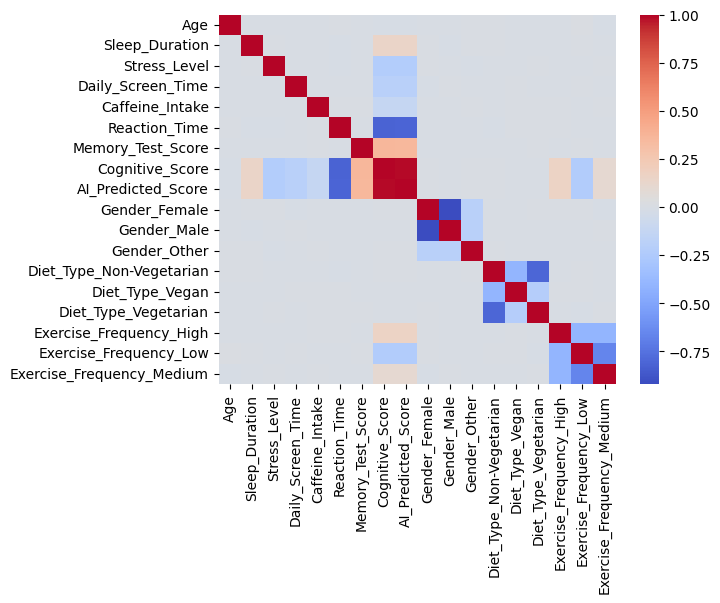

In [13]:
# Create the heatmap to see the correlations between all the columns of train_data
train_data2 = train_data.drop(["User_ID"], axis=1)
sns.heatmap(train_data2.corr(), cmap='coolwarm')

Cognitive_Score and AI_Predicted_Score features have weak positive correlations with Exercise_Frequency_Medium and Sleep_Duration, and a bit higher with Exercise_Frequency_High and Memory_Test_Score.

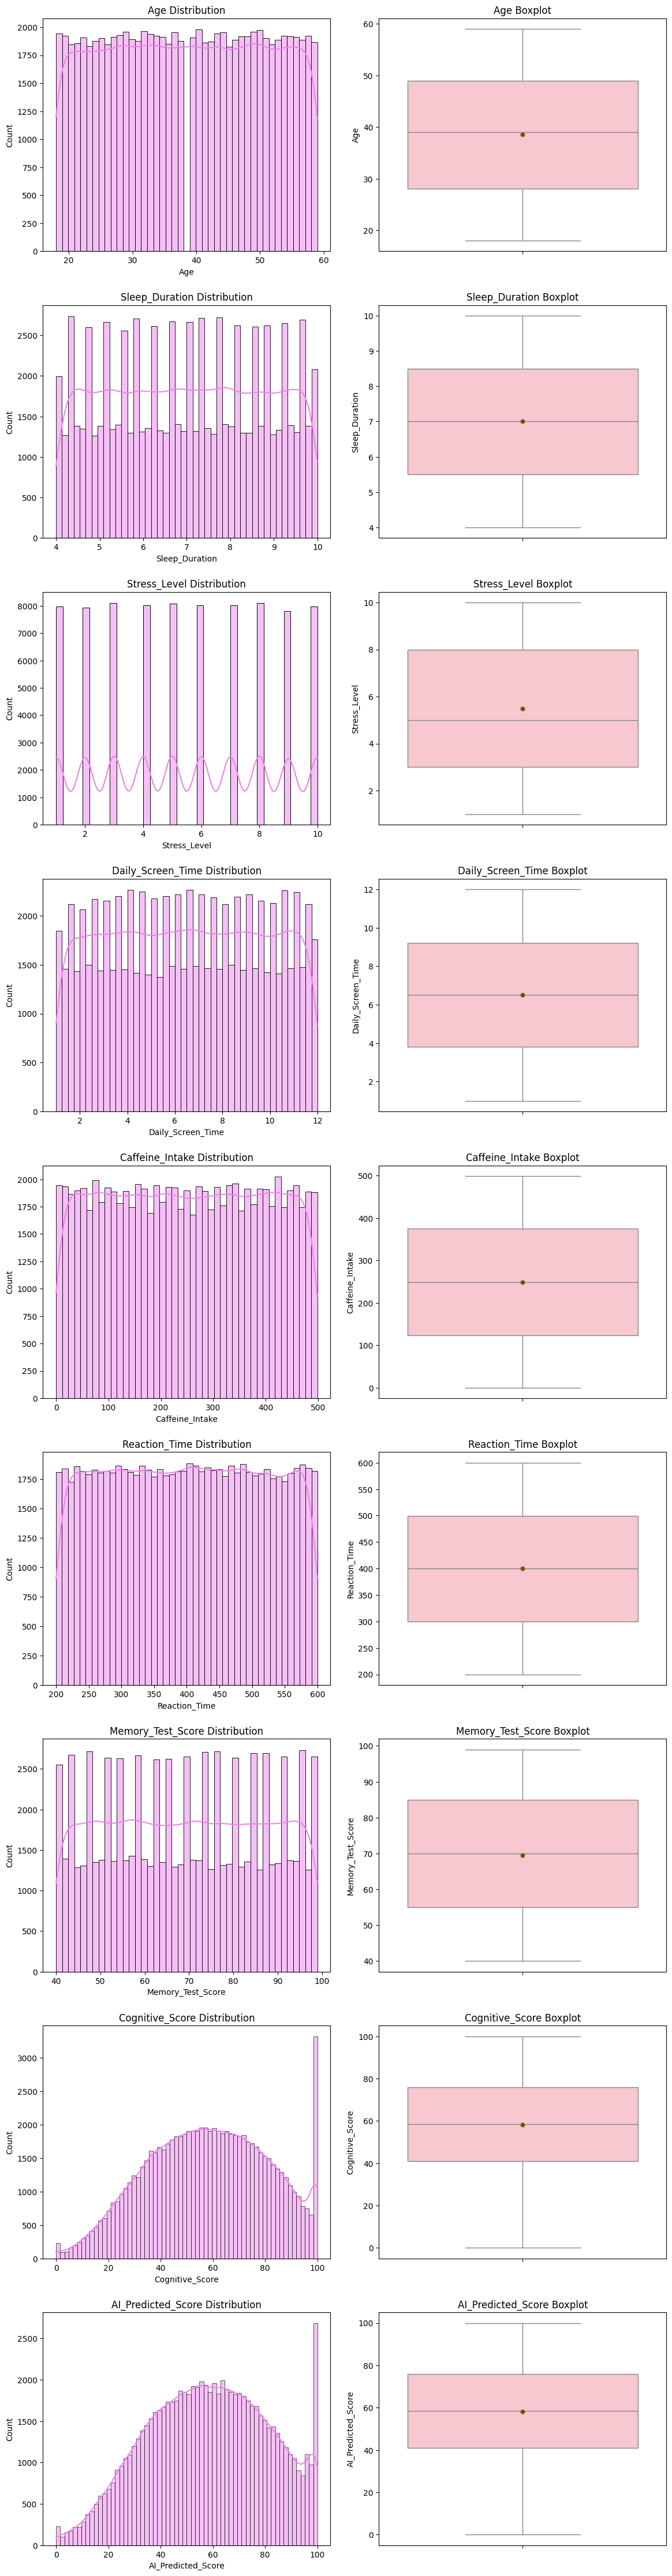

In [95]:
# Make distribution  plots (histograms and boxplots)
# List of numerical columns
numerical_cols = data.select_dtypes(include='number').columns

# Create subplots: one row per numerical column, 2 columns (histogram and boxplot)
n_cols = 2
n_rows = len(numerical_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Loop over each column and plot in the corresponding row
for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(data[col], kde=True, ax=axs[i, 0], color='violet')
    axs[i, 0].set_title(f"{col} Distribution")
    axs[i, 0].set_xlabel(col)

    # Boxplot
    sns.boxplot(y=data[col], ax=axs[i, 1], color='pink', showmeans=True, meanprops={"marker": "o", "markersize": 5, "markerfacecolor": "red"} )
    axs[i, 1].set_title(f"{col} Boxplot")

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

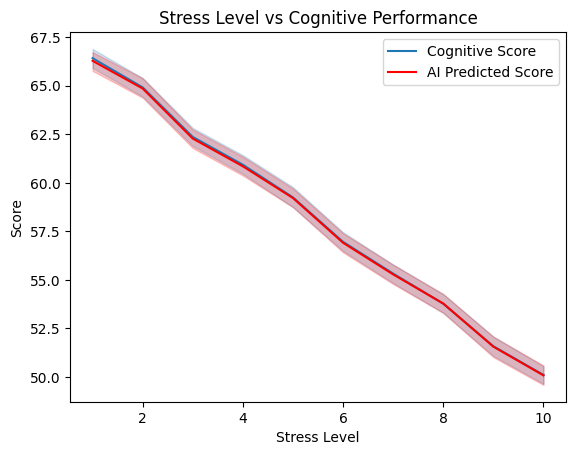

In [43]:
# Make a line plot between Stress_Level and Cognitive_Score, and Stress_Level and AI_Predicted_Score
ax = sns.lineplot(x = "Stress_Level",
             y = "Cognitive_Score",
             data = data, label='Cognitive Score')
sns.lineplot(x = "Stress_Level",
             y = "AI_Predicted_Score",
             data = data, color='red', label='AI Predicted Score', ax=ax)
plt.title("Stress Level vs Cognitive Performance")
plt.xlabel("Stress Level")
plt.ylabel("Score")
plt.show()

People who have much lower stress level tend to have greater cognitive scores, while those who have higher stress level tend to have lower scores.

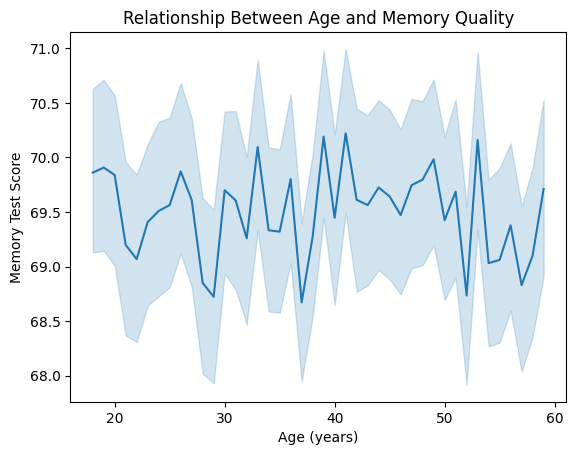

In [109]:
# Make a line plot between Age and Memory Quality
sns.lineplot(x = "Age",
             y = "Memory_Test_Score",
             data = data)
plt.title("Relationship Between Age and Memory Quality")
plt.xlabel("Age (years)")
plt.ylabel("Memory Test Score")
plt.show()

Memory quality will significanty decrease as someone gets older.

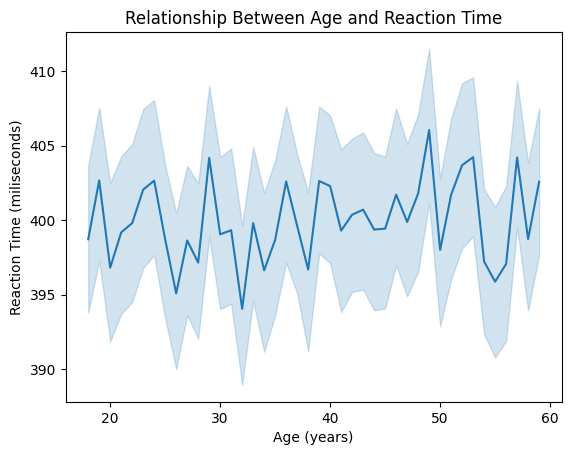

In [110]:
# Make a line plot between Age and Reaction Time
sns.lineplot(x = "Age",
             y = "Reaction_Time",
             data = data)
plt.title("Relationship Between Age and Reaction Time")
plt.xlabel("Age (years)")
plt.ylabel("Reaction Time (miliseconds)")
plt.show()

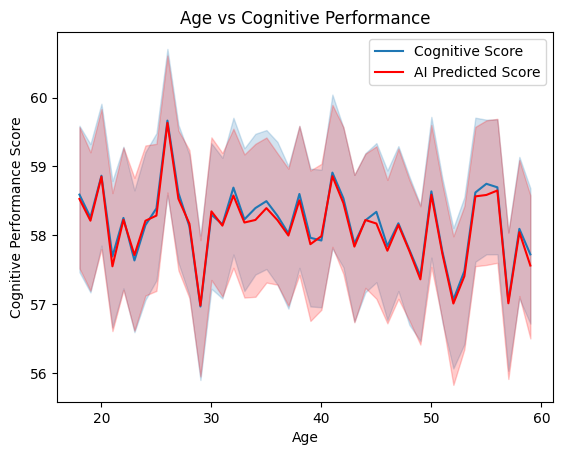

In [107]:
# Make a line plot between Age and Cognitive_Score, and Age and AI_Predicted_Score
ax = sns.lineplot(x = "Age",
             y = "Cognitive_Score",
             data = data, label='Cognitive Score')
sns.lineplot(x = "Age",
             y = "AI_Predicted_Score",
             data = data, color='red', label='AI Predicted Score', ax=ax)
plt.title("Age vs Cognitive Performance")
plt.xlabel("Age")
plt.ylabel("Cognitive Performance Score")
plt.show()

Most of younger adults have better cognitive performance compared to the elders.

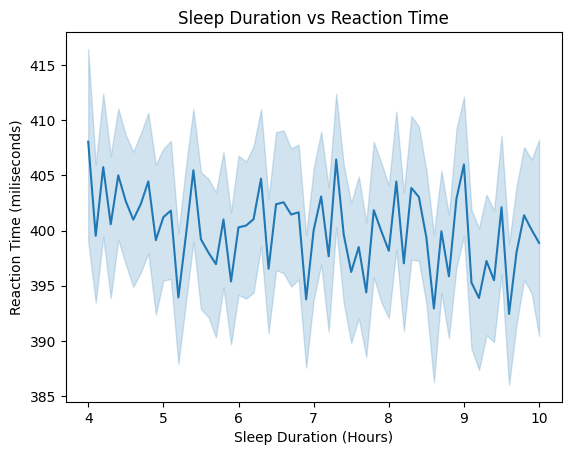

In [113]:
# Make a line plot between Stress_Level and Cognitive_Score, and Stress_Level and AI_Predicted_Score
sns.lineplot(x = "Sleep_Duration",
             y = "Reaction_Time",
             data = data)
plt.title("Sleep Duration vs Reaction Time")
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Reaction Time (miliseconds)")
plt.show()

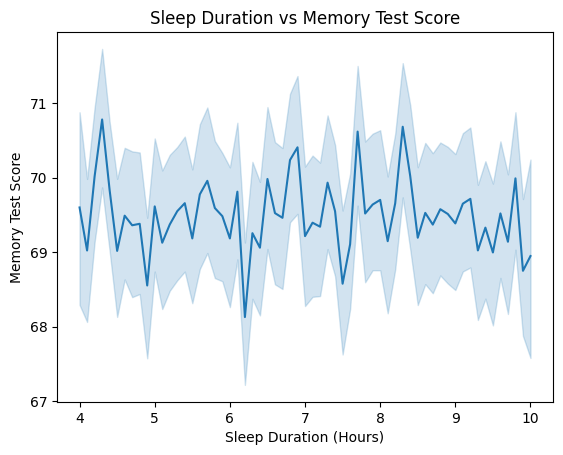

In [114]:
# Make a line plot between Stress_Level and Cognitive_Score, and Stress_Level and AI_Predicted_Score
sns.lineplot(x = "Sleep_Duration",
             y = "Memory_Test_Score",
             data = data)
plt.title("Sleep Duration vs Memory Test Score")
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Memory Test Score")
plt.show()

Both too little and too much sleep hours have a negative impact on memory quality.

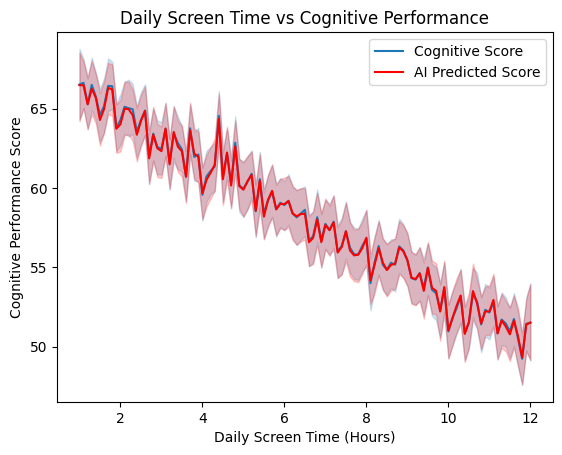

In [51]:
# Make a line plot between Screen Time and Cognitive Score, and Screen Time and AI Predicted Score
ax = sns.lineplot(x = "Daily_Screen_Time",
             y = "Cognitive_Score",
             data = data, label='Cognitive Score')
sns.lineplot(x = "Daily_Screen_Time",
             y = "AI_Predicted_Score",
             data = data, color='red', label='AI Predicted Score', ax=ax)
plt.title("Daily Screen Time vs Cognitive Performance")
plt.xlabel("Daily Screen Time (Hours)")
plt.ylabel("Cognitive Performance Score")
plt.show()

Too much screen exposure decreases the cognitive performance quality.

/tmp/ipython-input-3746567320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


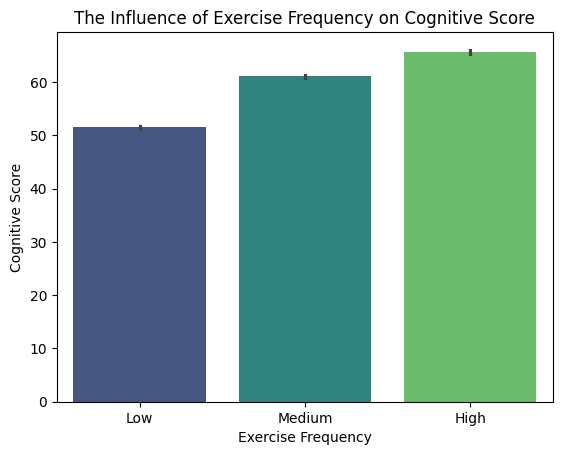

In [68]:
# Effects of exercise frequency on cognitive performance
# Barplot (shows mean + CI)
sns.barplot(
    x='Exercise_Frequency',
    y='Cognitive_Score',
    data=data,
    palette="viridis",
    order=['Low', 'Medium', 'High']
)
plt.title("The Influence of Exercise Frequency on Cognitive Score")
plt.xlabel("Exercise Frequency")
plt.ylabel("Cognitive Score")
plt.show()

Those who rarely do exercise tend to have lower cognitive score. The more often people do exercise, the better the cognitive performance quality they have.

/tmp/ipython-input-1489310666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


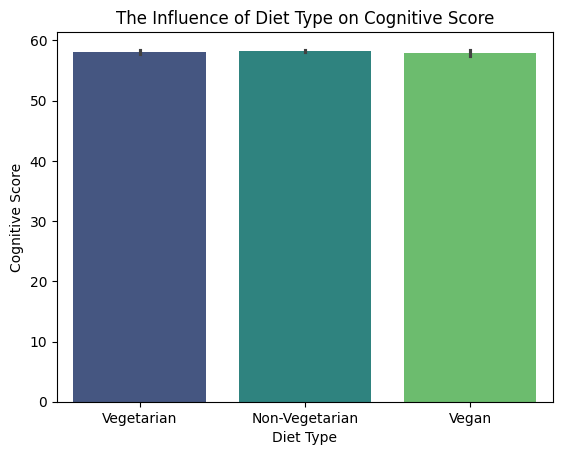

In [99]:
# Effects of diet type on cognitive performance
# Barplot (shows mean + CI)
sns.barplot(
    x='Diet_Type',
    y='Cognitive_Score',
    data=data,
    palette="viridis",
    order=['Vegetarian', 'Non-Vegetarian', 'Vegan']
)
plt.title("The Influence of Diet Type on Cognitive Score")
plt.xlabel("Diet Type")
plt.ylabel("Cognitive Score")
plt.show()

Someone's diet type doesn't have any relationship with cognitive performance.

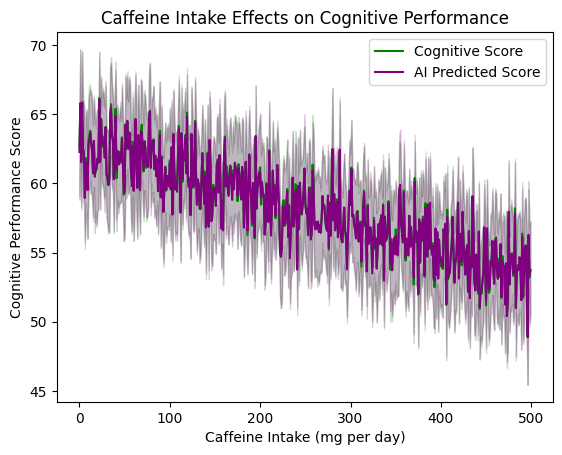

In [77]:
# Make a line plot between Caffeine Dose Usage and Cognitive_Score, and Caffeine Dose Usage and AI_Predicted_Score
ax = sns.lineplot(x = "Caffeine_Intake",
             y = "Cognitive_Score",
             data = data, color='green', label='Cognitive Score')
sns.lineplot(x = "Caffeine_Intake",
             y = "AI_Predicted_Score",
             data = data, color='purple', label='AI Predicted Score', ax=ax)
plt.title("Caffeine Intake Effects on Cognitive Performance")
plt.xlabel("Caffeine Intake (mg per day)")
plt.ylabel("Cognitive Performance Score")
plt.show()

Consuming caffeine in larger doses every day decreases cognitive performance.

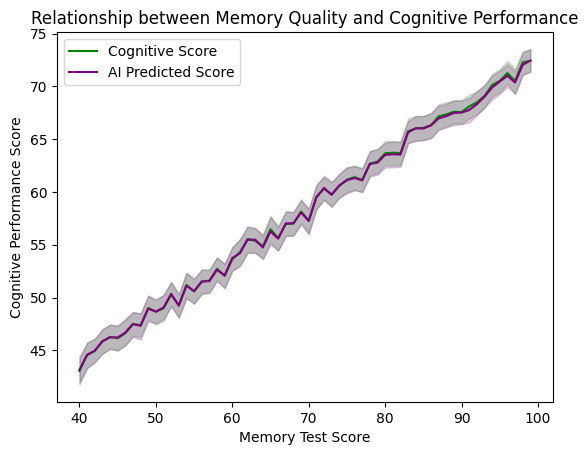

In [88]:
# Determine relationship between memory quality and cognitive performance
ax = sns.lineplot(x = "Memory_Test_Score",
             y = "Cognitive_Score",
             data = data, color='green', label='Cognitive Score')
sns.lineplot(x = "Memory_Test_Score",
             y = "AI_Predicted_Score",
             data = data, color='purple', label='AI Predicted Score', ax=ax)
plt.title("Relationship between Memory Quality and Cognitive Performance")
plt.xlabel("Memory Test Score")
plt.ylabel("Cognitive Performance Score")
plt.show()

The better memory quality of someone also means the better cognitive performance.

# Random Forest

In [18]:
# Creating a machine learning model using Random Forest
# Select features and target
X = train_data2.drop(['Cognitive_Score', "AI_Predicted_Score"], axis=1) # Features
y = train_data2['Cognitive_Score'] # Target (the objective), what we want to predict

from sklearn.model_selection import train_test_split
# "test_size=0.2" means 20% data will be used for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Import sklearn libraries to create the models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris

In [20]:
# Data scaling, fit and transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define random forest model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [22]:
# Evaluate regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r_squared = r2_score(y_test, y_pred_rf)

In [23]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r_squared)

MSE: 17.750278041840357
RMSE: 4.213107883954594
MAE: 3.354195178110894
R-squared: 0.966319481418032


In [24]:
# Drop the target and AI predicted columns from train_data before predicting
test_pred = rf.predict(scaler.transform(train_data2.drop(['Cognitive_Score', 'AI_Predicted_Score'], axis=1))).round(2) # Random Forest model

In [25]:
df = data.drop(["Cognitive_Score", "AI_Predicted_Score"], axis=1)
pred_rf = pd.merge(df, pd.DataFrame(test_pred, columns=['RandomForest_Predicted_Score']), left_index=True, right_index=True)

In [26]:
pred_rf

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,RandomForest_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,35.69
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,56.01
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,33.31
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,71.70
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,89.53
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.43
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,95.47
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,73.40
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,75.77


# Classification

In [28]:
# Classify individuals into low, medium, or high cognitive performance

def performance_level(test_pred):
  if test_pred['RandomForest_Predicted_Score'] >= 70 and test_pred['RandomForest_Predicted_Score'] <= 100:
    return 'High'
  elif test_pred['RandomForest_Predicted_Score'] >= 50 and test_pred['RandomForest_Predicted_Score'] < 70:
    return 'Medium'
  else:
    return 'Low'

In [29]:
# Apply the classfication results that consist three classes: Low, Medium, and High
pred_rf["Performance_Level"] = pred_rf.apply(performance_level, axis=1)
pred_rf

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,RandomForest_Predicted_Score,Performance_Level
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,35.69,Low
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,56.01,Medium
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,33.31,Low
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,71.70,High
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,89.53,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,50.43,Medium
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,95.47,High
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,73.40,High
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,75.77,High


In [31]:
groups = pred_rf.groupby(["Gender", "Performance_Level"]).size().unstack(fill_value=0)

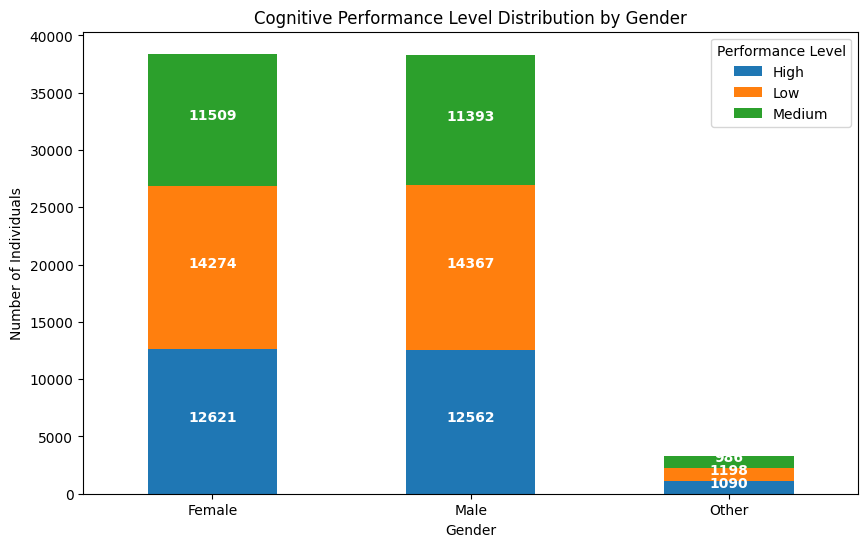

In [47]:
# Plot Gender and the amount of people in total to see which cognitive level they are classified to
ax = groups.plot(kind='bar', stacked=True, figsize=(10, 6))
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

plt.title('Cognitive Performance Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Performance Level')
plt.show()

Both males and females have even distributions for each cognitive performance level.

In [142]:
# Average sleep duration of people who have better cognitive performance
high_performance_sleep_duration = pred_rf[pred_rf["Performance_Level"] == 'High']["Sleep_Duration"].mean()

high_performance_sleep_duration.round(1)

np.float64(7.2)

In [132]:
# Average caffeine dose consumption of people who have better cognitive performance
high_performance_caffeine_dose = pred_rf[pred_rf["Performance_Level"] == 'High']["Caffeine_Intake"].mean()

high_performance_caffeine_dose.round(1)

np.float64(240.0)

In [136]:
# Average caffeine dose consumption of people who have better cognitive performance
high_performance_screen_time = pred_rf[pred_rf["Performance_Level"] == 'High']["Daily_Screen_Time"].mean()

high_performance_screen_time.round(1)

np.float64(6.0)

# Neural Network (Multi-Layer Perceptron)

In [34]:
# Create a Neural Network model using MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data for Neural Network
# Drop the target and AI predicted columns from train_data2
X2 = train_data2.drop(['Cognitive_Score', "AI_Predicted_Score"], axis=1) # Features
y2 = train_data2['Cognitive_Score'] # Target

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Separate numerical and categorical columns for scaling
numerical_cols = X_train2.select_dtypes(include=np.number).columns
categorical_cols = X_train2.select_dtypes(include='object').columns # Assuming object type for categorical after get_dummies

# Scale numerical features
scaler2 = StandardScaler()
X_train_scaled_numerical = scaler2.fit_transform(X_train2[numerical_cols])
X_test_scaled_numerical = scaler2.transform(X_test2[numerical_cols])

# Convert scaled numerical data back to DataFrame with original column names
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train2.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test2.index)


# Concatenate scaled numerical and original categorical features (assuming one-hot encoding already done)
# If get_dummies created boolean columns, they will be included in numerical_cols.
# So we just need to use the scaled numerical dataframe which now includes the one-hot encoded columns.
X_train_processed = X_train_scaled_numerical_df
X_test_processed = X_test_scaled_numerical_df

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_processed, y_train2, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 981.0834 - mae: 20.6010 - val_loss: 52.7437 - val_mae: 6.1679
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 45.2518 - mae: 5.8365 - val_loss: 37.6948 - val_mae: 5.6703
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 36.9676 - mae: 5.5351 - val_loss: 36.7677 - val_mae: 5.5168
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36.2740 - mae: 5.5121 - val_loss: 36.3056 - val_mae: 5.6055
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36.0282 - mae: 5.4962 - val_loss: 36.1127 - val_mae: 5.5385
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35.9326 - mae: 5.4980 - val_loss: 36.3127 - val_mae: 5.5968
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36.0396 - mae: 5.5060 - val_loss: 36.0112 - val_mae: 5.4759
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 35.5967 - mae: 5.4696 - val_loss: 35.9203 - val_mae: 5.4943
Epoch 9/10
1600/1600 ━━━━━━━━━━━━

In [35]:
# Evaluate the model
loss, mae = model.evaluate(X_test_processed, y_test2)
nn_mse = mean_squared_error(y_test2, model.predict(X_test_processed))
nn_rmse = np.sqrt(nn_mse)
nn_mae = mean_absolute_error(y_test2, model.predict(X_test_processed))
nn_r_squared = r2_score(y_test2, model.predict(X_test_processed))

print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test MSE:", nn_mse)
print("Test RMSE:", nn_rmse)
print("Test R-squared:", nn_r_squared)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 35.4189 - mae: 5.4027
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
Test Loss: 35.39996337890625
Test MAE: 5.403190612792969
Test MSE: 35.39997683713741
Test RMSE: 5.949787965729318
Test R-squared: 0.932829808363902


In [36]:
# Predict on the original data using the trained neural network model
# Select only the numerical columns before transforming the data
test_pred_nn = model.predict(scaler2.transform(train_data2.drop(['Cognitive_Score', 'AI_Predicted_Score'], axis=1)[numerical_cols]))

# Add the predictions to the original dataFrame
pred_nn = pd.merge(df, pd.DataFrame(test_pred_nn.round(2), columns=['NeuralNetwork_Predicted_Score']), left_index=True, right_index=True)

# Display the dataframe with the new prediction column
display(pred_nn)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,NeuralNetwork_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,33.389999
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,46.169998
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,39.570000
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,79.019997
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,85.180000
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,U79996,55,Male,7.8,9,Non-Vegetarian,9.4,Low,157,312.34,55,58.389999
79996,U79997,35,Female,9.8,6,Vegetarian,6.5,Medium,130,290.17,86,90.269997
79997,U79998,32,Female,7.3,10,Non-Vegetarian,7.5,Low,462,249.57,72,71.889999
79998,U79999,34,Male,8.7,8,Vegetarian,7.2,Medium,96,319.48,82,79.129997


In [37]:
# Merge old and new tables to compare predicted scores with reference/observed scores
pred_merged1 = pd.merge(data, pd.DataFrame(test_pred, columns=['RandomForest_Predicted_Score']), left_index=True, right_index=True)
pred_merged2 = pd.merge(pred_merged1, pd.DataFrame(pred_nn, columns=['NeuralNetwork_Predicted_Score']), left_index=True, right_index=True)

In [38]:
# Show the merged table
print("The original values and the prediction values")
pred_merged2[["Cognitive_Score", "RandomForest_Predicted_Score", "AI_Predicted_Score", "NeuralNetwork_Predicted_Score"]]

The original values and the prediction values


,Cognitive_Score,RandomForest_Predicted_Score,AI_Predicted_Score,NeuralNetwork_Predicted_Score
0,36.71,35.69,39.77,33.389999
1,54.35,56.01,57.68,46.169998
2,32.57,33.31,29.54,39.570000
3,70.15,71.70,74.59,79.019997
4,87.54,89.53,91.78,85.180000
...,...,...,...,...
79995,50.80,50.43,46.49,58.389999
79996,94.89,95.47,92.41,90.269997
79997,63.51,73.40,67.35,71.889999
79998,81.43,75.77,77.95,79.129997


In [101]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Apply the same classification logic to Neural Network predictions
def performance_level_nn(predicted_score):
  if predicted_score >= 70 and predicted_score <= 100:
    return 'High'
  elif predicted_score >= 50 and predicted_score < 70:
    return 'Medium'
  else:
    return 'Low'

# Add Neural Network performance level to the dataframe
pred_nn["Performance_Level_NN"] = pred_nn["NeuralNetwork_Predicted_Score"].apply(performance_level_nn)

# Merge the original data with both predictions and their performance levels
pred_merged = pd.merge(data, pred_rf[['RandomForest_Predicted_Score', 'Performance_Level']], left_index=True, right_index=True)
pred_merged = pd.merge(pred_merged, pred_nn[['NeuralNetwork_Predicted_Score', 'Performance_Level_NN']], left_index=True, right_index=True)


# Now classify the actual Cognitive_Score from the original data
def performance_level_actual(score):
    if score >= 70 and score <= 100:
        return 'High'
    elif score >= 50 and score < 70:
        return 'Medium'
    else:
        return 'Low'

pred_merged['Actual_Performance_Level'] = pred_merged['Cognitive_Score'].apply(performance_level_actual)


# Calculate classification metrics for Random Forest
print("Random Forest Classification Report:")
print(classification_report(pred_merged['Actual_Performance_Level'], pred_merged['Performance_Level'], zero_division=0))

# Calculate classification metrics for Neural Network
print("\nNeural Network (Multi-Layer Perceptron) Classification Report:")
print(classification_report(pred_merged['Actual_Performance_Level'], pred_merged['Performance_Level_NN'], zero_division=0))

# For ROC AUC, we need to binarize the labels
actual_levels_binarized = label_binarize(pred_merged['Actual_Performance_Level'], classes=['Low', 'Medium', 'High'])
rf_predicted_levels_binarized = label_binarize(pred_merged['Performance_Level'], classes=['Low', 'Medium', 'High'])
nn_predicted_levels_binarized = label_binarize(pred_merged['Performance_Level_NN'], classes=['Low', 'Medium', 'High'])

# Calculate ROC AUC for each class (OvR - One vs Rest)
roc_auc_rf = roc_auc_score(actual_levels_binarized, rf_predicted_levels_binarized, average=None)
roc_auc_nn = roc_auc_score(actual_levels_binarized, nn_predicted_levels_binarized, average=None)

print("\nRandom Forest ROC AUC per class (Low, Medium, High):", roc_auc_rf)
print("Neural Network ROC AUC per class (Low, Medium, High):", roc_auc_nn)

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.93      0.93     26382
         Low       0.94      0.94      0.94     30016
      Medium       0.84      0.85      0.85     23602

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000


Neural Network (Multi-Layer Perceptron) Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.86      0.86     26382
         Low       0.87      0.88      0.87     30016
      Medium       0.73      0.72      0.72     23602

    accuracy                           0.83     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.83      0.83      0.83     80000


Random Forest ROC AUC per class (Low, Medium, High): [0.95186121 0.89448239 0.94895749]
Neural Network ROC AUC per class (Low, Medium, H

Based on the comparison, the predicted scores are quite close to reference scores. However, Random Forest model has a much better accuracy compared to Neural Network model.

# Summary:


* The average score of people's cognitive peformance score is around 58, which is categorized as medium level.
* People who have much lower stress level tend to have greater cognitive scores, while those who have higher stress level tend to have lower scores. It means good stress management and a supportive environment are required to improve people's cognitive performance quality.
* Most of younger adults have better cognitive performance compared to the elders. Brain and body gradually change as people grow older, which result in weaker muscle strength and cognitive impairment. Some of the signs are bad memory quality and slower reaction times.
* A greater sleep quality, exercise frequency, little screen time, and lower caffeine consumption have a significant positive impact on cognitive performance, yet either too little or too much sleep time will negatively affect people's memory quality. The average of the sleep hours of research populations who are classified to "High" cognitive performance level are approximately 7.2 hours. It means the ideal time to have a good sleep quality is at least 7 hours, while the caffeine dose usage per day at maximum is 240 mg and the screen time shouldn't be more than 6 hours per day.
* Anyone can be classified to any cognitive performance level, regardless of the gender or group.
* Random Forest machine learning model has a higher accuracy compared to Neural Network model at predicting human's cognitive performance score based on their lifestyle.


